## HOJA EN SUCIO DEL ANÁLISIS DE SENSIBILIDAD

In [8]:
# Importar módulos necesarios
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle 
import math
import os

In [9]:
 # Definir función para cargar datos desde JSON
def cargar_datos_desde_json(ruta_archivo):
    with open(ruta_archivo, 'r') as archivo:
        datos = json.load(archivo)
    return datos

In [37]:
# Leer datos desde el archivo JSON
ruta_archivo_json = os.path.join(os.getcwd(), 'models/epsilon_sparsification_CHINA.json')
datos_buenos = cargar_datos_desde_json(ruta_archivo_json)
#print(datos2)

In [11]:
modelos = ["AGRESTE", "AIRCRAFT", "AIRSP", "AMPL", "CHINA", "CLEARLAK", "DEA", "DECOMP", "DEMO1", "DIET", "GUSSEX1", "GUSSGRID", "IBM1", "IMSL", "JOBT", "KAND", "LANDS", "MARKOV", "MEXSS", "MINE","ORANI","PAKLIVE","PRODMIX","QP5", "ROBERT","SENSTRAN", "SPARTA", "SRKANDW", "SRPCHASE","TRNSPORT","UIMP", "WHOUSE"]

In [12]:
print(modelos)

['AGRESTE', 'AIRCRAFT', 'AIRSP', 'AMPL', 'CHINA', 'CLEARLAK', 'DEA', 'DECOMP', 'DEMO1', 'DIET', 'GUSSEX1', 'GUSSGRID', 'IBM1', 'IMSL', 'JOBT', 'KAND', 'LANDS', 'MARKOV', 'MEXSS', 'MINE', 'ORANI', 'PAKLIVE', 'PRODMIX', 'QP5', 'ROBERT', 'SENSTRAN', 'SPARTA', 'SRKANDW', 'SRPCHASE', 'TRNSPORT', 'UIMP', 'WHOUSE']


In [13]:
modelos1  = ['AGRESTE' ,'AIRCRAFT', 'AIRSP', 'AMPL','ASYNCLOOP','BLEND', 'DIET','PAPERCO','CHINA', 'CLEARLAK', 'DEA', 'DECOMP', 'DEMO1', 'DIET', 'GUSSEX1', 'GUSSGRID', 'IBM1', 'IMSL', 'JOBT', 'KAND', 'LANDS', 'MARKOV', 'MEXSS', 'MINE', 'ORANI', 'PAKLIVE', 'PRODMIX', 'QP5', 'ROBERT', 'SENSTRAN', 'SPARTA', 'SRKANDW', 'SRPCHASE', 'TRNSPORT', 'UIMP', 'WHOUSE']

In [14]:
llaves_consideradas = ['epsilon', 'objective_function', 'decision_variables',
                       'changed_indices', 'constraint_violation', 'of_original_decision']
tipo = ['primal', 'dual']

In [15]:
#Función para calcular la media de cada sublista
def calcular_medias(lista):
    medias = []
    for sublista in lista:
        if isinstance(sublista, list):
            if len(sublista) > 1:
                media = np.nanmean(sublista)
                medias.append(media)
            elif len(sublista) == 1:
                medias.append(sublista[0])
            else:
                medias.append(None)
        elif isinstance(sublista, (float, int)):
            medias.append(sublista)
    return medias

In [16]:
def calcular_longitudes(vector_con_vectores):
    # Creamos una lista para almacenar las longitudes de los vectores
    longitudes = []

    # Iteramos sobre cada vector en el vector_con_vectores
    for vector in vector_con_vectores:
        # Si el vector es None, consideramos su longitud como 0
        if vector is None:
            longitudes.append(0)
        # Si el vector contiene NaN, lo excluimos del cálculo de longitud
        elif isinstance(vector, (list, np.ndarray)) and np.isnan(vector).any():
            continue
        else:
            # Verificamos si el vector es iterable antes de intentar calcular su longitud
            try:
                longitud = len(vector)
            except TypeError:
                # Si no es iterable, agregamos 0 a las longitudes
                longitud = 0
            longitudes.append(longitud)

    return longitudes

In [17]:
def establecer_a_cero_valores_menores(lista_de_listas, cifra_referencia):

    for i in range(len(lista_de_listas)):
        for j in range(len(lista_de_listas[i])):
            if abs(lista_de_listas[i][j]) < cifra_referencia:
                lista_de_listas[i][j] = 0
    return lista_de_listas


# PARA ALGUNOS MODELOS COMO AIRCRAFT, APARECEN SUBLISTAN NaN y hay que quitarlas
def quitar_sublistas_nan(lista_de_listas):
    lista_sin_nan = [sublista for sublista in lista_de_listas if not np.any(np.isnan(sublista))]
    return lista_sin_nan

In [18]:
def convert_late_zeros_to_nan(vector):
    found_non_zero = False
    for i, num in enumerate(vector):
        if num != 0:
            found_non_zero = True
        elif found_non_zero and num == 0:
            vector[i] = float('nan')
    return vector

In [19]:
def multiplicar_matrices(A, B):
    # Obtener las dimensiones de las matrices
    filas_A = len(A)
    columnas_A = len(A[0])
    filas_B = len(B)
    columnas_B = len(B[0])

    # Verificar si las matrices son multiplicables
    if columnas_A != columnas_B:
        raise ValueError("Las matrices no son multiplicables")

    # Inicializar la matriz resultante con ceros
    C = [[0] * columnas_B for _ in range(filas_A)]

    # Multiplicar elemento por elemento y sumar los resultados
    for i in range(filas_A):
        for j in range(columnas_B):
            for k in range(columnas_A):
                C[i][j] = A[i][j] * B[i][j]


    return C
def obtener_sumas_de_sublistas(lista_de_listas):
    return [sum(map(float, sublista)) for sublista in lista_de_listas]


In [20]:
import matplotlib.pyplot as plt

def graficar1(modelo_pr_epsilon, vector1, titulo, nombre1):
    # Determinar la longitud máxima de los vectores
    max_length = max(len(modelo_pr_epsilon), len(vector1))
    
    # Generar el eje_x con la misma longitud que el vector más largo
    eje_x = modelo_pr_epsilon[:max_length]
    
    # Graficar los vectores
    plt.figure(figsize=(8, 6))
    plt.plot(eje_x[:len(vector1)], vector1, label=nombre1)
    
    # Configurar etiquetas y título con tamaños de letra
    plt.xlabel('Epsilon', fontsize=15,fontname = 'Times New Roman')
    plt.ylabel('', fontsize=12)
    plt.title(titulo, fontsize=16, fontname = 'Times New Roman')
    
    # Configurar leyenda con tamaño de letra
    plt.legend(fontsize=12)
    
    # Configurar tamaño de letra de los ticks
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Configurar otros parámetros del gráfico
    plt.grid(False)
    plt.xlim(eje_x[0], eje_x[-1])  # Ajustar límites del eje x
    
    # Mostrar el gráfico
    plt.show()

In [21]:
## PROBLEM COMPLEXITY, con el tiempo de ejecución -- NO SACAMOS CONCLUSIONES DE ESTO, SE PUEDE EVITAR
tipo = 'primal' # primal o dual
llave = 'execution_time'

datos = datos_buenos
for modelo in modelos1: 
    nombre_modelo = modelo
    modelo_pr_eps = datos[nombre_modelo][tipo]['epsilon']
    # Eliminar el primer elemento del vector
    modelo_pr_time = datos[nombre_modelo][tipo][llave][1:]
    # Convertir los tiempos a números flotantes
    modelo_pr_time = [float(tiempo.split(':')[2]) for tiempo in modelo_pr_time]
    print(nombre_modelo)
    print(modelo_pr_time)
    print(len(modelo_pr_time))
    divisor = modelo_pr_time[0] if modelo_pr_time else None
    modelo_pr_time_pu = [elemento / divisor for elemento in modelo_pr_time] if divisor else None
    complexity_problem = modelo_pr_time_pu
    graficar1(modelo_pr_eps, complexity_problem, "Complexity","Complexity")
    print(complexity_problem)
    print(len(complexity_problem))
    print(len(modelo_pr_eps))

KeyError: 'AGRESTE'

In [34]:
def prueba_complejidad(modelo, datos):
    if modelo in datos:
        modelo_datos = datos[modelo]
        modelo_primal = modelo_datos.get('primal', {})
        modelo_dual = modelo_datos.get('dual', {})
        
        modelo_pr_eps = modelo_primal.get('epsilon', [])
        modelo_pr_of = modelo_primal.get('objective_function', [])
        modelo_pr_dv = modelo_primal.get('decision_variables', [])
        modelo_pr_ci = modelo_primal.get('changed_indices', [])
        modelo_pr_cv = modelo_primal.get('constraint_violation', [])
        modelo_pr_ofod = modelo_primal.get('of_original_decision', [])
        modelo_pr_time = modelo_primal.get('execution_time', [])
        modelo_du_dv = modelo_dual.get('decision_variables', [])        
        ## PROBLEM COMPLEXITY, con el tiempo de ejecución
        modelo_pr_time1 = modelo_pr_time[1:];
    
        # Convertir los tiempos a números flotantes
        modelo_pr_time1 = [float(tiempo.split(':')[2]) for tiempo in modelo_pr_time1]
    
        divisor = modelo_pr_time1[0] if modelo_pr_time1 else None
        modelo_pr_time_pu = [elemento / divisor for elemento in modelo_pr_time1] if divisor else None
        complexity_problem = modelo_pr_time_pu
        print(complexity_problem)
        return 

In [30]:
def analisis_de_sensibilidad(modelo, datos):
    if modelo in datos:
        modelo_datos = datos[modelo]
        modelo_primal = modelo_datos.get('primal', {})
        modelo_dual = modelo_datos.get('dual', {})
        
        modelo_pr_eps = modelo_primal.get('epsilon', [])
        modelo_pr_of = modelo_primal.get('objective_function', [])
        modelo_pr_dv = modelo_primal.get('decision_variables', [])
        modelo_pr_ci = modelo_primal.get('changed_indices', [])
        modelo_pr_cv = modelo_primal.get('constraint_violation', [])
        modelo_pr_ofod = modelo_primal.get('of_original_decision', [])
        modelo_pr_time = modelo_primal.get('execution_time', [])
        modelo_du_dv = modelo_dual.get('decision_variables', [])
        
        # Cálculo de degradación de la función objetivo original
        divisor = modelo_pr_of[0] if modelo_pr_of else None
        modelo_pr_of_pu = [elemento / divisor for elemento in modelo_pr_of] if divisor else None
        # Cálculo de degradación de la función objetivo original
        divisor1 = modelo_pr_ofod[0] if modelo_pr_ofod else None
        modelo_pr_ofod_pu = [elemento / divisor1 for elemento in modelo_pr_ofod] if divisor1 else None
        
        
        ## Cálculo de INFEASIBILITY INDEX
        cifra_referencia = 1e-6 
        modelo_pr_cv_sin_nan = quitar_sublistas_nan(modelo_pr_cv) 
        modelo_pr_cv_filtrado = establecer_a_cero_valores_menores(modelo_pr_cv_sin_nan,cifra_referencia)
        
        producto_cv_vd = multiplicar_matrices(modelo_pr_cv_filtrado,modelo_du_dv)
        suma_producto = obtener_sumas_de_sublistas(producto_cv_vd)
        infeasiblity_index  = [x / abs(modelo_pr_ofod[0]) for x in suma_producto]
        
        ## Cálculo de PROBLEM COMPLEXITY
        
        ## Cálculo de la media de la constraint violations
        modelo_pr_cv_medias = calcular_medias(modelo_pr_cv)
        ## Cálculo de los índices cambiados a 0 de la matriz A
        acumulado_modelo_ci = calcular_longitudes(modelo_pr_ci)
        #for i, num in enumerate(acumulado_modelo_ci[1:], start=1):
        #    if num == 0:
        #        acumulado_modelo_ci[i] = float('nan')
        convert_late_zeros_to_nan(acumulado_modelo_ci)
        elementos_A_totales = len(modelo_pr_dv)*len(modelo_du_dv)
        ## Ahora calculamos el número de no 0s en la matriz A, para cada valor de epsilon. Esto lo podemos calcular mediante el 
        ## número de indices que cambian en cada nivel de epsilon
        elementos_A_que_se_hacen_0_pu = [x / elementos_A_totales for x in acumulado_modelo_ci]
        complexity_problem = [1 - x for x in elementos_A_que_se_hacen_0_pu]
        suma_objfunc_unfeasiblity = [a + b for a, b in zip(modelo_pr_ofod_pu, infeasiblity_index)]
        
        ## PROBLEM COMPLEXITY, con el tiempo de ejecución
        #modelo_pr_time1 = modelo_pr_time[1:];
    
        # Convertir los tiempos a números flotantes
        #modelo_pr_time1 = [float(tiempo.split(':')[2]) for tiempo in modelo_pr_time1]
    
        #divisor = modelo_pr_time1[0] if modelo_pr_time1 else None
        #modelo_pr_time_pu = [elemento / divisor for elemento in modelo_pr_time1] if divisor else None
        #complexity_problem = modelo_pr_time_pu;
        ## GRÁFICAS
        #titulo1=(modelo + " Objective function degradation vs complexity")
        #titulo2=(modelo + " Infeasibility ")
        #titulo3=(modelo + " Sum of infeasibility and objective function")
        titulo1=(modelo + " Objective function degradation")
        titulo2=(modelo + " Infeasibility evolution")
        titulo3=(modelo + " Complexity evolution")
        objective_function = "Objective function"
        complexity = "Complexity"
        infeasibility = "Infeasibility"
        #suma = "Objective function + Infeasibility"
        #graficar2(modelo_pr_eps,modelo_pr_ofod_pu,complexity_problem,titulo1,objective_function,complexity)
        #graficar2(modelo_pr_eps,infeasiblity_index, complexity_problem,titulo2,infeasibility,complexity)
        graficar1(modelo_pr_eps,modelo_pr_ofod_pu,titulo1,objective_function)
        graficar1(modelo_pr_eps,infeasiblity_index,titulo2,infeasibility)
        graficar1(modelo_pr_eps,complexity_problem,titulo3,complexity)
        
        print(elementos_A_que_se_hacen_0_pu)
        return 
    
    else:
        print(f"El modelo '{modelo}' no se encontró en los datos proporcionados.")
        return None

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


El modelo 'AGRESTE' no se encontró en los datos proporcionados.
El modelo 'AIRCRAFT' no se encontró en los datos proporcionados.
El modelo 'AIRSP' no se encontró en los datos proporcionados.
El modelo 'AMPL' no se encontró en los datos proporcionados.
El modelo 'CHINA' no se encontró en los datos proporcionados.
El modelo 'CLEARLAK' no se encontró en los datos proporcionados.
El modelo 'DEA' no se encontró en los datos proporcionados.
El modelo 'DECOMP' no se encontró en los datos proporcionados.
El modelo 'DEMO1' no se encontró en los datos proporcionados.
El modelo 'DIET' no se encontró en los datos proporcionados.
El modelo 'GUSSEX1' no se encontró en los datos proporcionados.
El modelo 'GUSSGRID' no se encontró en los datos proporcionados.
El modelo 'IBM1' no se encontró en los datos proporcionados.
El modelo 'IMSL' no se encontró en los datos proporcionados.
El modelo 'JOBT' no se encontró en los datos proporcionados.
El modelo 'KAND' no se encontró en los datos proporcionados.
El

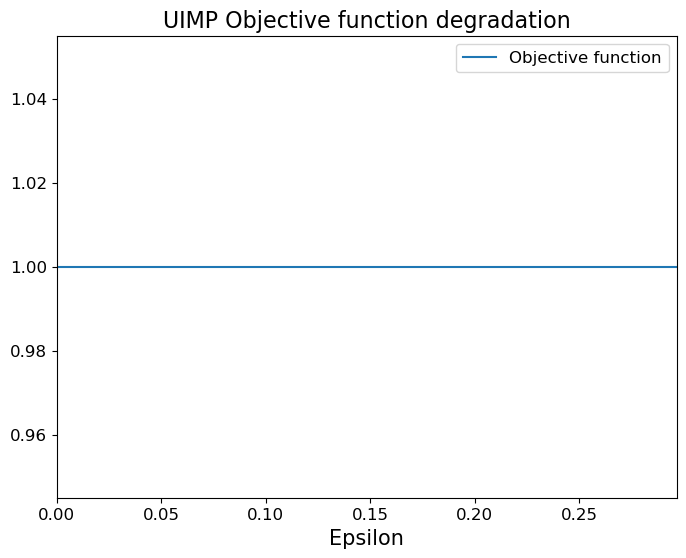

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


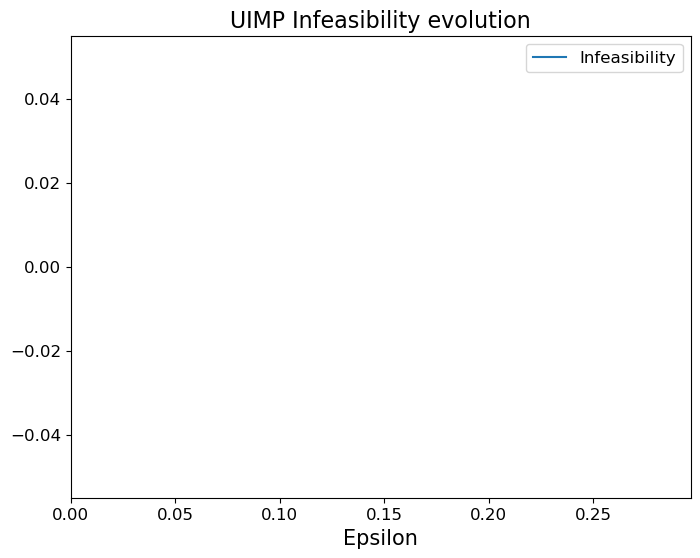

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


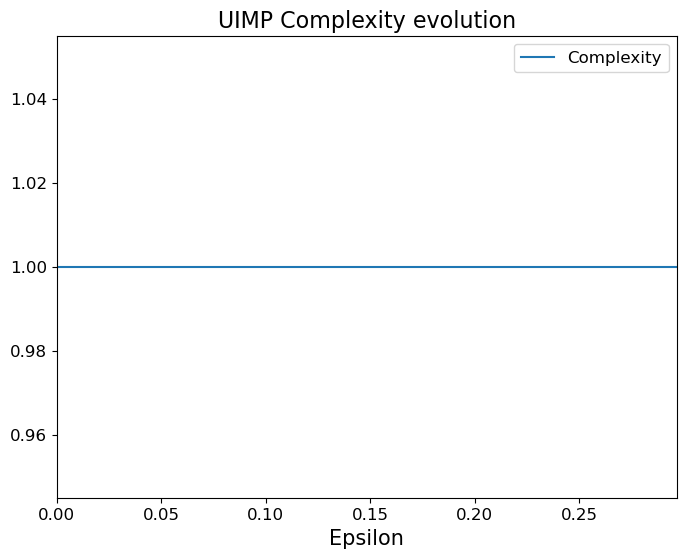

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
El modelo 'WHOUSE' no se encontró en los datos proporcionados.


In [36]:
## BUCLE PARA HACER LAS ITERACION DE TODOS LOS MODELOS: 

for elemento in modelos:
    
    analisis_de_sensibilidad(elemento, datos_buenos)

In [37]:
# Reading and showing the result of an specific model
model_name = 'IBM1'  # Name of the model
tipo = 'primal' # primal or dual
key = 'epsilon' # key considered
modelo_pr_eps = datos_buenos[model_name][tipo][key]

model_name = 'IBM1'  # Name of the model
tipo = 'primal' # primal or dual
key = 'constraint_violation' # key considered
modelo_pr_cv = datos_buenos[model_name][tipo][key]

model_name = 'IBM1'  # Name of the model
tipo = 'primal' # primal or dual
key = 'decision_variables' # key considered
modelo_pr_dv = datos_buenos[model_name][tipo][key]

model_name = 'IBM1'  # Name of the model
tipo = 'dual' # primal or dual
key = 'decision_variables' # key considered
modelo_du_dv = datos_buenos[model_name][tipo][key]

model_name = 'IBM1'  # Name of the model
tipo = 'primal' # primal or dual
key = 'of_original_decision' # key considered
modelo_pr_ofod = datos_buenos[model_name][tipo][key]

model_name = 'IBM1'  # Name of the model
tipo = 'primal' # primal or dual
key = 'changed_indices' # key considered
modelo_pr_ci = datos_buenos[model_name][tipo][key]

KeyError: 'IBM1'

In [ ]:
##INFEASIBILITY INDEX
cifra_referencia = 1e-6

modelo_pr_cv_sin_nan = quitar_sublistas_nan(modelo_pr_cv)
modelo_pr_cv_filtrado = establecer_a_cero_valores_menores(modelo_pr_cv_sin_nan, cifra_referencia)

producto_cv_vd = multiplicar_matrices(modelo_pr_cv_filtrado, modelo_du_dv)
suma_producto = obtener_sumas_de_sublistas(producto_cv_vd)

unfeasiblity_index = [x / abs(modelo_pr_ofod[0]) for x in suma_producto]

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


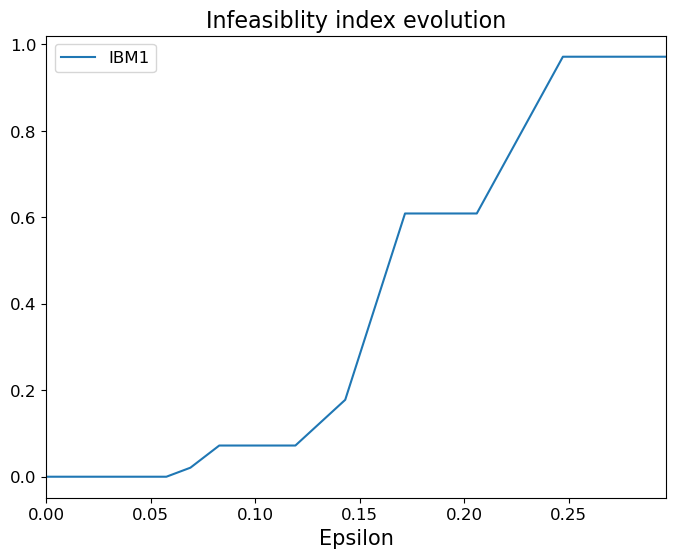

In [ ]:
titulo3=("Infeasiblity index evolution")
modelo=("IBM1")
graficar1(modelo_pr_eps,unfeasiblity_index,titulo3,modelo)

In [ ]:
## Cálculo de PROBLEM COMPLEXITY


## Cálculo de los índices cambiados a 0 de la matriz A
acumulado_modelo_ci = calcular_longitudes(modelo_pr_ci)
elementos_A_totales = len(modelo_pr_dv) * len(modelo_du_dv)

## Ahora calculamos el número de no 0s en la matriz A, para cada valor de epsilon. Esto lo podemos calcular mediante el 
## número de índices que cambian en cada nivel de epsilon
elementos_A_que_se_hacen_0_pu = [x / elementos_A_totales for x in acumulado_modelo_ci]
complexity_problem = [1 - x for x in elementos_A_que_se_hacen_0_pu]



findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


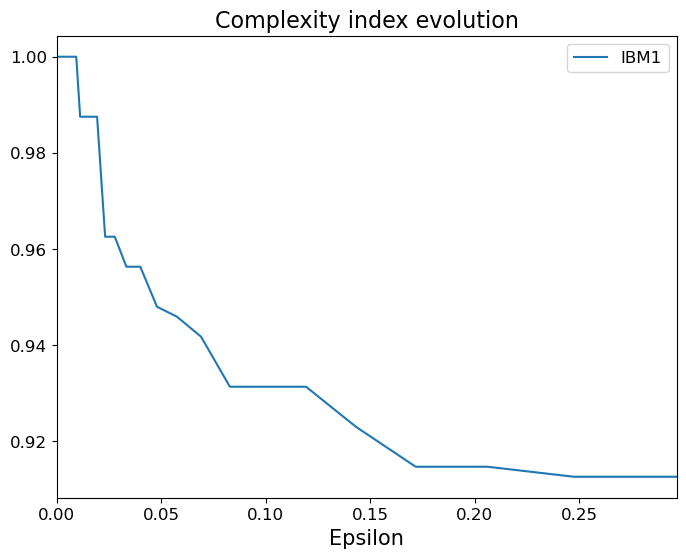

In [ ]:
titulo3=("Complexity index evolution")
modelo=("IBM1")
graficar1(modelo_pr_eps,complexity_problem,titulo3,modelo)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_media(lista):
    return np.nanmean(lista) if lista else None

def calcular_mediana(lista):
    return np.nanmedian(lista) if lista else None

def calcular_cuartiles(lista):
    return np.nanpercentile(lista, [25, 75]) if lista else (None, None)

def ajustar_longitudes(eps, datos):
    min_longitud = min(len(eps), len(datos))
    return eps[:min_longitud], datos[:min_longitud]

def rellenar_con_nan(datos, longitud_maxima):
    return datos + [np.nan] * (longitud_maxima - len(datos))

def analisis_de_sensibilidad_global(modelos, datos):
    # Definir variables para almacenar los datos
    all_epsilons = {}
    all_objective_function_degradation = {}
    all_infeasibility = {}
    all_complexity = {}
    
    # Inicializar listas para acumular datos
    objective_function_degradation_list = []
    infeasibility_list = []
    complexity_list = []
    
    # Determinar la longitud máxima
    max_length = 0
    for modelo in modelos:
        if modelo in datos:
            modelo_datos = datos[modelo]
            modelo_primal = modelo_datos.get('primal', {})
            
            modelo_pr_eps = modelo_primal.get('epsilon', [])
            modelo_pr_of = modelo_primal.get('objective_function', [])
            modelo_pr_cv = modelo_primal.get('constraint_violation', [])
            modelo_pr_ci = modelo_primal.get('changed_indices', [])
            modelo_pr_ofod = modelo_primal.get('of_original_decision', [])
            modelo_du_dv = modelo_datos.get('dual', {}).get('decision_variables', [])
            modelo_pr_dv = modelo_primal.get('decision_variables', [])
            # Cálculo de degradación de la función objetivo original
            divisor = modelo_pr_of[0] if modelo_pr_of else None
            modelo_pr_ofod_pu = [elemento / divisor for elemento in modelo_pr_of] if divisor else []

            # Cálculo de INFEASIBILITY INDEX
            cifra_referencia = 1e-6 
            modelo_pr_cv_sin_nan = quitar_sublistas_nan(modelo_pr_cv) 
            modelo_pr_cv_filtrado = establecer_a_cero_valores_menores(modelo_pr_cv_sin_nan, cifra_referencia)
            
            if modelo_du_dv and modelo_pr_cv_filtrado:
                producto_cv_vd = multiplicar_matrices(modelo_pr_cv_filtrado, modelo_du_dv)
                suma_producto = obtener_sumas_de_sublistas(producto_cv_vd)
                infeasiblity_index = [x / abs(modelo_pr_ofod[0]) for x in suma_producto] if modelo_pr_ofod else []
            else:
                infeasiblity_index = []

            # Cálculo de PROBLEM COMPLEXITY
            acumulado_modelo_ci = calcular_longitudes(modelo_pr_ci)
            elementos_A_totales = len(modelo_pr_dv) * len(modelo_du_dv)
            print(elementos_A_totales)
            elementos_A_que_se_hacen_0_pu = [x / elementos_A_totales for x in acumulado_modelo_ci] if elementos_A_totales else []
            complexity_problem = [1 - x for x in elementos_A_que_se_hacen_0_pu]
            
            # Actualizar la longitud máxima
            max_length = max(max_length, len(modelo_pr_eps), len(modelo_pr_ofod_pu), len(infeasiblity_index), len(complexity_problem))

            # Acumular datos para análisis global
            all_epsilons[modelo] = modelo_pr_eps
            all_objective_function_degradation[modelo] = modelo_pr_ofod_pu
            all_infeasibility[modelo] = infeasiblity_index
            all_complexity[modelo] = complexity_problem
            
            # Asegurarse de que todas las listas tengan la misma longitud
            objective_function_degradation_list.append(rellenar_con_nan(modelo_pr_ofod_pu, max_length))
            infeasibility_list.append(rellenar_con_nan(infeasiblity_index, max_length))
            complexity_list.append(rellenar_con_nan(complexity_problem, max_length))
            print(complexity_list)
        else:
            print(f"El modelo '{modelo}' no se encontró en los datos proporcionados.")

    # Función para calcular estadísticas por índice
    def calcular_estadisticas_por_indice(datos_por_indice):
        num_epsilons = len(datos_por_indice[0]) if datos_por_indice else 0
        media = [calcular_media([datos[i] for datos in datos_por_indice]) for i in range(num_epsilons)]
        mediana = [calcular_mediana([datos[i] for datos in datos_por_indice]) for i in range(num_epsilons)]
        cuartiles = [calcular_cuartiles([datos[i] for datos in datos_por_indice]) for i in range(num_epsilons)]
        return media, mediana, cuartiles
    
    # Calcular estadísticas para cada métrica
    media_of, mediana_of, cuartiles_of = calcular_estadisticas_por_indice(objective_function_degradation_list)
    media_infeasibility, mediana_infeasibility, cuartiles_infeasibility = calcular_estadisticas_por_indice(infeasibility_list)
    media_complexity, mediana_complexity, cuartiles_complexity = calcular_estadisticas_por_indice(complexity_list)
    
    # Función para graficar los datos
    def graficar_datos(titulo, ylabel, datos_dict, estadisticas_dict=None):
        plt.figure(figsize=(10, 6))
        colores = plt.cm.get_cmap('tab10', len(datos_dict))
        
        for i, modelo in enumerate(modelos):
            eps = all_epsilons.get(modelo, [])
            datos = datos_dict.get(modelo, [])
            eps_ajustado, datos_ajustado = ajustar_longitudes(eps, datos)
            
            plt.plot(eps_ajustado, datos_ajustado, label=f'{modelo}')

        if estadisticas_dict:
            num_epsilons = len(estadisticas_dict.get('media', []))
            #eps_comunes = np.linspace(min(eps_ajustado), max(eps_ajustado), num=num_epsilons)
            media = estadisticas_dict.get('media', [])
            mediana = estadisticas_dict.get('mediana', [])
            cuartiles = estadisticas_dict.get('cuartiles', [])
            cuartiles_25 = [q[0] for q in cuartiles]
            cuartiles_75 = [q[1] for q in cuartiles]
            
            print(f"Longitudes para graficar estadísticas: eps_ajustado = {len(eps_ajustado)}, media = {len(media)}, mediana = {len(mediana)}, cuartiles_25 = {len(cuartiles_25)}, cuartiles_75 = {len(cuartiles_75)}")

            plt.plot(eps_ajustado, media[:len(eps_ajustado)], '--', label='Media', color='black')
            plt.plot(eps_ajustado, mediana[:len(eps_ajustado)], ':', label='Median', color='blue')
            plt.plot(eps_ajustado, cuartiles_25[:len(eps_ajustado)], '-.', label='Quartile 25', color='green')
            plt.plot(eps_ajustado, cuartiles_75[:len(eps_ajustado)], '-.', label='Quartile 75', color='red')
        
        figure_path = os.path.join(os.getcwd(), 'figures')
        plt.title(titulo,  fontsize=20)
        plt.xlabel("Epsilon", fontsize=14)
        plt.ylabel(ylabel)
        plt.legend(fontsize=12)
        plt.savefig(os.path.join(figure_path, f"{titulo}.png"))
        plt.show()
        # Save the plot
        

    # Graficar datos acumulados
    graficar_datos(f"Objective Function Degradation for type {modelos}", "", all_objective_function_degradation, 
                   {'media': media_of, 'mediana': mediana_of, 'cuartiles': cuartiles_of})
    graficar_datos(f"Infeasibility Evolution for type {modelos}", "", all_infeasibility, 
                   {'media': media_infeasibility, 'mediana': mediana_infeasibility, 'cuartiles': cuartiles_infeasibility})
    graficar_datos(f"Complexity Evolution for type {modelos}", "", all_complexity, 
                   {'media': media_complexity, 'mediana': mediana_complexity, 'cuartiles': cuartiles_complexity})
    return


In [35]:
#graphed:
modelos_tipo1 = ['AIRSP', 'PRODMIX', 'SPARTA' ]
#graphed:
modelos_tipo2 = ['AIRCRAFT','SRKANDW','UIMP']
#grahped:
modelos_tipo3 = ['GUSSEX1','GUSSGRID','SENSTRAN','TRNSPORT']
modelos_tipo4 = ['CHINA']

289
[[1.0, 0.8719723183391004, 0.8685121107266436, 0.8685121107266436, 0.8685121107266436, 0.8685121107266436, 0.8373702422145328, 0.8304498269896194, 0.8200692041522492, 0.7923875432525952, 0.7820069204152249, 0.7335640138408305, 0.71280276816609, 0.6747404844290658, 0.6643598615916955, 0.6574394463667821, 0.629757785467128]]
Longitudes para graficar estadísticas: eps_ajustado = 17, media = 17, mediana = 17, cuartiles_25 = 17, cuartiles_75 = 17


/tmp/ipykernel_478777/1450459556.py:5: RuntimeWarning: Mean of empty slice
  return np.nanmean(lista) if lista else None
/home/brgonzalez/miniconda3/envs/ioptimization/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/home/brgonzalez/miniconda3/envs/ioptimization/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/tmp/ipykernel_478777/1450459556.py:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(datos_dict))


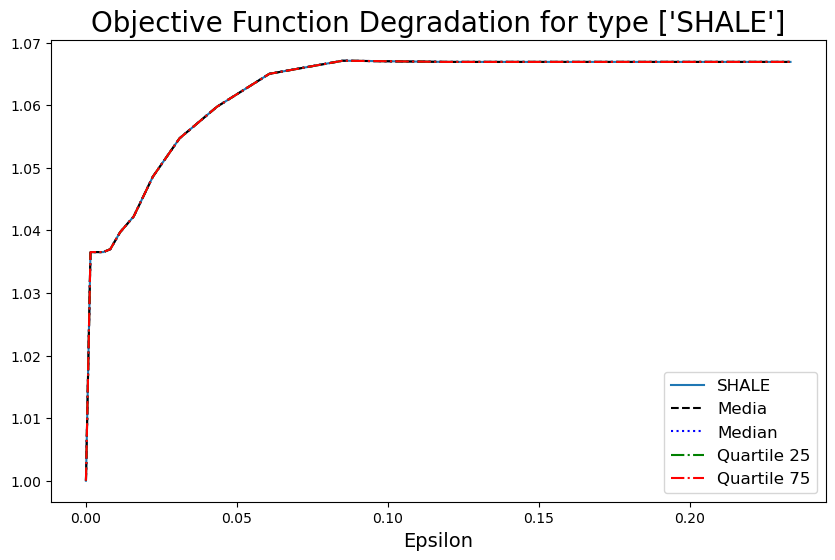

Longitudes para graficar estadísticas: eps_ajustado = 17, media = 17, mediana = 17, cuartiles_25 = 17, cuartiles_75 = 17


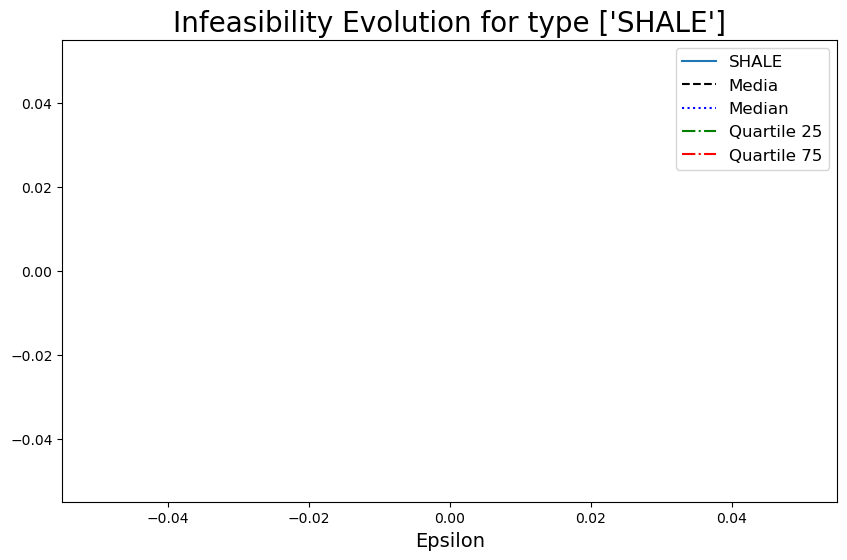

Longitudes para graficar estadísticas: eps_ajustado = 17, media = 17, mediana = 17, cuartiles_25 = 17, cuartiles_75 = 17


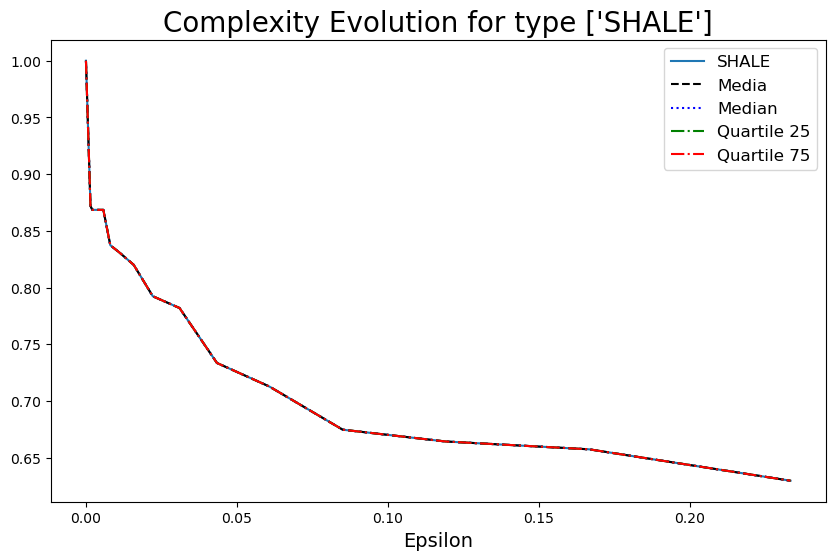

In [38]:
# ELEGIR EL TIPO QUE SE QUIERE GRAFICAR - hay que cambiar también en la función analisis_de_sensibilidad el título de la gráfica

analisis_de_sensibilidad_global(modelos_tipo4, datos_buenos)
# analisis_de_sensibilidad_global(modelos_tipo3, datos_buenos)
# analisis_de_sensibilidad_global(modelos_tipo2, datos_buenos)
# analisis_de_sensibilidad_global(modelos_tipo1, datos_buenos)